In [1]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from PIL import Image
import pandas as pd
from livelossplot import PlotLossesKeras
from sklearn.externals import joblib
from scipy import misc
import keras


/home/manish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/manish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return f(*args, **kwds)
/home/manish/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/manish/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# fileList = listOfFiles     

# def imageLoader(files, batch_size):

#     L = len(files)

#     #this line is just to make the generator infinite, keras needs that    
#     while True:

#         batch_start = 0
#         batch_end = batch_size

#         while batch_start < L:
#             limit = min(batch_end, L)
#             X = someMethodToLoadImages(files[batch_start:limit])
#             Y = someMethodToLoadTargets(files[batch_start:limit])

#             yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

#             batch_start += batch_size   
#             batch_end += batch_size

In [3]:
#playing with the data:
total_files=0
data_list=[]
files_list=[]
DATA_DIRECTORY="/home/manish/Downloads/LISA_TL_dayTrain/dayTrain/"
directories=[f for f in os.listdir(DATA_DIRECTORY) if f.startswith('day')]
for direct in directories:
    print(direct)
    total_files+=len(os.listdir(DATA_DIRECTORY+direct+"/frames/"))
    files=os.listdir(DATA_DIRECTORY+direct+"/frames/")
    for i in files:
        files_list.append(i)
    annot=pd.read_csv(DATA_DIRECTORY+direct+"/frameAnnotationsBULB.csv",delimiter=";")
    annot=annot[['Filename','Annotation tag']]
    print(annot['Annotation tag'].value_counts())
    data_list.append(annot)
print(total_files)

dayClip5
go             3648
stop           3008
stopLeft       2481
warning         291
goLeft          198
warningLeft      91
Name: Annotation tag, dtype: int64
dayClip10
go          109
stopLeft     28
Name: Annotation tag, dtype: int64
dayClip7
stop           2856
stopLeft       2430
go             2412
warning         259
goLeft          145
warningLeft      87
Name: Annotation tag, dtype: int64
dayClip8
stop        785
stopLeft    530
go          502
goLeft      208
Name: Annotation tag, dtype: int64
dayClip3
stop       1071
warning     138
go          118
Name: Annotation tag, dtype: int64
dayClip4
go    832
Name: Annotation tag, dtype: int64
dayClip9
stopLeft       872
stop           568
go             411
goLeft          86
warningLeft      3
Name: Annotation tag, dtype: int64
dayClip6
stop        460
go          428
stopLeft    327
Name: Annotation tag, dtype: int64
dayClip1
stop    4124
go      3929
Name: Annotation tag, dtype: int64
dayClip12
go    229
Name: Annotation tag

In [4]:
data=pd.concat(data_list,axis=0,ignore_index=True)
data

,Filename,Annotation tag
0,dayTraining/dayClip5--00000.png,go
1,dayTraining/dayClip5--00000.png,go
2,dayTraining/dayClip5--00000.png,go
3,dayTraining/dayClip5--00000.png,go
4,dayTraining/dayClip5--00000.png,go
5,dayTraining/dayClip5--00000.png,go
6,dayTraining/dayClip5--00000.png,goLeft
7,dayTraining/dayClip5--00000.png,goLeft
8,dayTraining/dayClip5--00001.png,go
9,dayTraining/dayClip5--00001.png,go


In [5]:
print(data['Annotation tag'].value_counts())

stop           15356
go             14085
stopLeft        6987
goLeft           865
warning          834
warningLeft      291
Name: Annotation tag, dtype: int64


In [6]:
merged=data.groupby('Filename')['Annotation tag'].apply(','.join).reset_index()
print(merged['Annotation tag'].value_counts())

stop,stop,stopLeft                                       2841
stop,stop,stop                                           1823
go,go,stopLeft                                           1718
stop,stopLeft                                             821
go,go,go,go,go                                            713
stop,stop                                                 618
go                                                        616
go,go                                                     487
go,stopLeft                                               414
go,go,go                                                  414
go,go,go,go,stopLeft                                      251
go,go,stop,stop,stopLeft                                  251
stop                                                      178
stop,stop,stopLeft,stopLeft                               138
go,go,go,go                                               133
stop,goLeft                                               132
go,go,go

In [7]:
print(merged['Annotation tag'].value_counts().index)
ann_to_keep=['stop,stop,stopLeft', 'stop,stop,stop', 'go,go,stopLeft',
       'stop,stopLeft', 'go,go,go,go,go', 'stop,stop', 'go', 'go,go',
       'go,stopLeft', 'go,go,go',
       'go,go,go,go,stopLeft', 'stop', 'stop,stop,stopLeft,stopLeft',
       'go,go,go,go', 'stop,goLeft', 'go,go,go,go,goLeft', 'go,goLeft', 'stop,stop,stop,stopLeft', 'stop,stop,goLeft,goLeft', 'go,go,goLeft',
       'stop,stop,goLeft', 'go,go,warningLeft,warningLeft',
       'go,go,stopLeft,stopLeft',
       'go,go,warning,warning,warning,warningLeft,warningLeft',
       'go,go,go,go,go,go,goLeft,goLeft',
       'go,go,go,stopLeft',
       'go,go,go,goLeft', 'go,go,warning,warning,warning,warningLeft',
       'go,goLeft,stopLeft', 'go,stopLeft,stopLeft', 'go,go,goLeft,goLeft']

Index(['stop,stop,stopLeft', 'stop,stop,stop', 'go,go,stopLeft',
       'stop,stopLeft', 'go,go,go,go,go', 'stop,stop', 'go', 'go,go',
       'go,stopLeft', 'go,go,go', 'go,go,go,go,stopLeft',
       'go,go,stop,stop,stopLeft', 'stop', 'stop,stop,stopLeft,stopLeft',
       'go,go,go,go', 'stop,goLeft', 'go,go,go,go,goLeft', 'go,goLeft',
       'stop,stop,stop,stopLeft', 'goLeft', 'stop,stop,goLeft,goLeft',
       'warning,warning', 'go,go,stop,stop,stop,stop', 'go,go,goLeft',
       'stop,stop,goLeft', 'go,go,warningLeft,warningLeft',
       'go,go,stop,stop,stop', 'warning,warning,warning',
       'go,go,warning,warning,warning,stopLeft,stopLeft',
       'go,go,stopLeft,stopLeft',
       'go,go,warning,warning,warning,warningLeft,warningLeft',
       'warning,warning,warning,warningLeft,warningLeft',
       'go,go,go,go,go,go,goLeft,goLeft', 'warning,warning,stopLeft',
       'go,go,go,stopLeft', 'warning,warning,warning,warningLeft',
       'go,go,go,goLeft', 'go,go,warning,warning,w

In [8]:
merged_selected=merged[merged["Annotation tag"].isin(ann_to_keep)]
print(merged_selected['Annotation tag'].value_counts().index)

Index(['stop,stop,stopLeft', 'stop,stop,stop', 'go,go,stopLeft',
       'stop,stopLeft', 'go,go,go,go,go', 'stop,stop', 'go', 'go,go',
       'go,go,go', 'go,stopLeft', 'go,go,go,go,stopLeft', 'stop',
       'stop,stop,stopLeft,stopLeft', 'go,go,go,go', 'stop,goLeft',
       'go,go,go,go,goLeft', 'go,goLeft', 'stop,stop,stop,stopLeft',
       'stop,stop,goLeft,goLeft', 'go,go,goLeft', 'stop,stop,goLeft',
       'go,go,warningLeft,warningLeft', 'go,go,stopLeft,stopLeft',
       'go,go,warning,warning,warning,warningLeft,warningLeft',
       'go,go,go,go,go,go,goLeft,goLeft', 'go,go,go,stopLeft',
       'go,go,go,goLeft', 'go,go,warning,warning,warning,warningLeft',
       'go,goLeft,stopLeft', 'go,stopLeft,stopLeft', 'go,go,goLeft,goLeft'],
      dtype='object')


In [9]:
ann_to_replace={'stop,stop,stopLeft':'stop', 'stop,stop,stop':'stop', 'go,go,stopLeft':'go',
       'stop,stopLeft':'stop', 'go,go,go,go,go':'go', 'stop,stop':'stop', 'go':'go', 'go,go':'go',
       'go,stopLeft':'go', 'go,go,go':'go', 'go,go,go,go,stopLeft':'go', 'stop':'stop',
       'stop,stop,stopLeft,stopLeft':'stop', 'go,go,go,go':'go', 'stop,goLeft':'stop',
       'go,go,go,go,goLeft':'go', 'go,goLeft':'go', 'stop,stop,stop,stopLeft':'stop',
       'stop,stop,goLeft,goLeft':'stop', 'go,go,goLeft':'go', 'stop,stop,goLeft':'stop',
       'go,go,warningLeft,warningLeft':'go', 'go,go,stopLeft,stopLeft':'go',
       'go,go,warning,warning,warning,warningLeft,warningLeft':'go',
       'go,go,go,go,go,go,goLeft,goLeft':'go', 'go,go,go,stopLeft':'go',
       'go,go,go,goLeft':'go', 'go,go,warning,warning,warning,warningLeft':'go',
       'go,goLeft,stopLeft':'go', 'go,stopLeft,stopLeft':'go', 'go,go,goLeft,goLeft':'go'}

In [10]:
print(merged_selected)
merged_selected=merged_selected.replace(ann_to_replace)
print(merged_selected)

                              Filename Annotation tag
0      dayTraining/dayClip1--00000.png          go,go
1      dayTraining/dayClip1--00001.png          go,go
2      dayTraining/dayClip1--00002.png          go,go
3      dayTraining/dayClip1--00003.png          go,go
4      dayTraining/dayClip1--00004.png          go,go
5      dayTraining/dayClip1--00005.png          go,go
6      dayTraining/dayClip1--00006.png          go,go
7      dayTraining/dayClip1--00007.png          go,go
8      dayTraining/dayClip1--00008.png          go,go
9      dayTraining/dayClip1--00009.png          go,go
10     dayTraining/dayClip1--00010.png          go,go
11     dayTraining/dayClip1--00011.png          go,go
12     dayTraining/dayClip1--00012.png          go,go
13     dayTraining/dayClip1--00013.png          go,go
14     dayTraining/dayClip1--00014.png          go,go
15     dayTraining/dayClip1--00015.png          go,go
16     dayTraining/dayClip1--00016.png          go,go
17     dayTraining/dayClip1-

In [11]:
merged_selected["Annotation tag"].value_counts()

stop    6785
go      5322
Name: Annotation tag, dtype: int64

In [12]:
DATA_DIRECTORY="/home/manish/Downloads/LISA_TL_dayTrain/dayTrain/"
batch_size=128

In [13]:
# getting the data
# root_dir = os.path.abspath('.')
# data_dir = "/home/manish/Downloads/LISA_TL_dayTrain/dayTrain/"
# images=[]
# train=merged_selected.sample(frac=1)
# # training images
# count=0
# for img_name in train.Filename:
#     f_name=img_name.split("/")[1]
#     dict_name=f_name.split("--")[0]
#     img_path=os.path.join(data_dir,dict_name,"frames/",f_name)
#     img=Image.open(img_path).resize((124,150))
#     img_data=np.array(img.getdata(),np.uint8).reshape(img.size[1], img.size[0], 3)
#     img_data=img_data.astype(np.float64)
#     images.append(img_data)
#     img.close()
# train_images=np.stack(images)
# joblib.dump(train_images,'datasets/tl/train/tl_train.pkl')

# # # test images
# # test_img=[]
# # for img_name in test.ID:
# #     path=os.path.join(data_dir,'test/Test',img_name)
# # #     img=Image.open(path).convert('L').resize((32,32))
# #     img=Image.open(path).resize((32,32))
# #     img.dtype=np.float32
# #     test_img.append(img)
# # test_x=np.stack(test_img)

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
train=merged_selected
# replce_target={"go":1,"stop":0}
# train=train.replace(replce_target)
dataframe=train.sample(frac=1)
filenames=dataframe['Filename'].tolist()
filenames=[a.split("/")[1] for a in filenames]
lb=LabelEncoder()
ann = lb.fit_transform(dataframe['Annotation tag'])
ann= keras.utils.np_utils.to_categorical(ann)
print(ann)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lb=LabelEncoder()
ann = lb.fit_transform(train['Annotation tag'])
ann= keras.utils.np_utils.to_categorical(ann)

In [16]:
# def next_batch():
#     file_directs=os.listdir(DATA_DIRECTORY)
#     idx=0
#     while True:
#         for idx in range(int(len(filenames)/batch_size)):
#             x,y=get_items(idx,filenames,ann)
# #             misc.imshow(x[0])
# #             print(y)
#             yield(x,y)
        
# def get_items(idx,filenames,ann):
#         batch_x = filenames[idx * batch_size:(idx + 1) * batch_size]
#         batch_y = ann[idx * batch_size:(idx + 1) * batch_size]
# #         batch_y_enc=encoder.transform(batch_y)
#         return np.array([
#             resize(imread(DATA_DIRECTORY+file_name.split("--")[0]+"/frames/"+file_name),(124,150))
#                for file_name in batch_x]), np.array(batch_y)

In [17]:
# itr=next_batch()

In [18]:
class ksequence(keras.utils.Sequence):

    def __init__(self, filenames, ann, batch_size):
        self.x, self.y = filenames, ann
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        return np.array([
            resize(imread(DATA_DIRECTORY+file_name.split("--")[0]+"/frames/"+file_name), (112, 150))
               for file_name in batch_x]), np.array(batch_y)

In [19]:
itr=ksequence(filenames[0:9600],ann[0:9650],batch_size)
itr_v=ksequence(filenames[9650:],ann[9650:],batch_size)

In [20]:
def Densenet(input_shape,num_layers,filters,growth_rate,num_blocks,num_classes,compression,dropout_rate=None,weight_decay=1e-04):
    input_layer=Input(input_shape)
    net=Conv2D(filters=filters*2,kernel_size=7,strides=2,kernel_initializer='he_normal',padding='same',kernel_regularizer=regularizers.l2(weight_decay),activation="elu")(input_layer)
    net=MaxPool2D(pool_size=3,strides=2,padding='same')(net)
    for block in range(num_blocks-1):
        net,filters=dense_block(net,filters,num_layers[block],growth_rate,elu=True,dropout_rate=dropout_rate)
        net=transition_block(net,filters,compression,elu=True,dropout_rate=dropout_rate)
        filters=int(filters*compression)
    net,filters=dense_block(net,filters,num_layers[block],growth_rate,elu=True)
    net=GlobalAveragePooling2D()(net)
    fc=Dense(units=2,activation="softmax")(net)
    model=Model(inputs=input_layer,outputs=fc)
    return model
def conv(inputs,filters,elu=True,dropout_rate=None):
    if not elu:
        x=BatchNormalization()(inputs)
        x=ReLU()(x)
        x=Conv2D(filters=filters*4,kernel_size=1,kernel_initializer="he_normal",strides=1,kernel_regularizer=regularizers.l2(weight_decay))(x)
        if dropout_rate:
            x = Dropout(dropout_rate)(x)
        x=BatchNormalization()(x)
        x=ReLU()(x)
        x = ZeroPadding2D((1, 1))(x)
        x=Conv2D(filters=filters,kernel_size=3,kernel_initializer="he_normal",strides=1)(x)
        if dropout_rate:
            x = Dropout(dropout_rate)(x)
    else:
        x=Conv2D(filters=filters*4,kernel_size=1,kernel_initializer="he_normal",strides=1,activation='elu',kernel_regularizer=regularizers.l2(weight_decay))(inputs)
        if dropout_rate:
            x = Dropout(dropout_rate)(x)
        x = ZeroPadding2D((1, 1))(x)
        x=Conv2D(filters=filters,kernel_size=3,kernel_initializer="he_normal",strides=1,activation='elu')(x)
        if dropout_rate:
            x = Dropout(dropout_rate)(x)
    return x

def dense_block(x,filters,num_layers,growth_rate,elu=True,dropout_rate=None):
    layer_list=[x]
    for i in range(num_layers):
        con=conv(x,growth_rate,elu,dropout_rate)
        layer_list.append(con)
        x=concatenate(layer_list,axis=-1)
#         x=concatenate([x,con],axis=-1)
        filters+=growth_rate
    return x,filters
        
def transition_block(inputs,filters,compression,elu=True,dropout_rate=None):
    if not elu:
        x=BatchNormalization()(inputs)
        x=ReLU()(x)
        x=Conv2D(filters=int(filters*compression),kernel_size=1,kernel_initializer="he_normal",strides=1,padding='same',kernel_regularizer=regularizers.l2(weight_decay))(x)
        if dropout_rate:
            x = Dropout(dropout_rate)(x)
        x=AveragePooling2D(pool_size=2,strides=2)(x)
    else:
        x=Conv2D(filters=int(filters*compression),kernel_size=1,kernel_initializer="he_normal",strides=1,padding='same',kernel_regularizer=regularizers.l2(weight_decay))(inputs)
        if dropout_rate:
            x = Dropout(dropout_rate)(x)
        x=AveragePooling2D(pool_size=2,strides=2)(x)
    return x
        

In [21]:
input_shape=(112,150,3)
num_layers=[6,6,6]
growth_rate=12
num_blocks=3
num_classes=2
filters=12
compression=0.5
dropout_rate=0
weight_decay=1e-04

In [22]:
def progressive_model():
    model=Sequential()
    model.add(Conv2D(input_shape=input_shape,filters=32,kernel_size=7,strides=2,kernel_initializer='he_normal',padding='same',activation="elu"))
    model.add(Conv2D(filters=32,kernel_size=5,strides=2,kernel_initializer='he_normal',padding='same',activation="elu"))
    model.add(Conv2D(filters=32,kernel_size=5,strides=2,kernel_initializer='he_normal',padding='same',activation="elu"))
    model.add(Flatten())
    model.add(Dense(activation="elu",units=516))
    model.add(Dense(activation="softmax",units=2))
    return model

In [23]:
model=Densenet(input_shape,num_layers,filters,growth_rate,num_blocks,num_classes,compression,dropout_rate,weight_decay)
# model=progressive_model()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 112, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 56, 75, 24)   3552        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 28, 38, 24)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 38, 48)   1200        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
zero_paddi

In [24]:
model.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(lr=0.001),metrics=["accuracy"])

In [25]:
def clr(epoch):
        cycle = np.floor(1+clr_iterations/(2*step_size))
        x = np.abs(clr_iterations/step_size - 2*cycle + 1)
        if scale_mode == 'cycle':
            return base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))*scale_fn(cycle)
        else:
            return base_lr + (max_lr-self.base_lr)*np.maximum(0, (1-x))*scale_fn(clr_iterations)

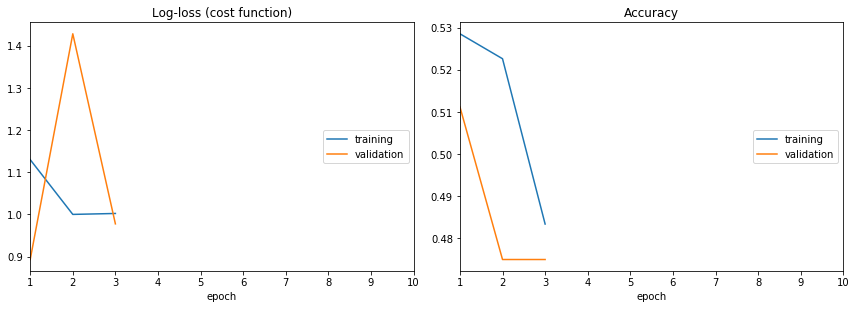

Epoch 4/10
14/94 [===>..........................] - ETA: 11:13 - loss: 0.9025 - acc: 0.6267

/home/manish/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/manish/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/manish/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


15/94 [===>..........................] - ETA: 11:07 - loss: 0.8829 - acc: 0.6516

/home/manish/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


81/94 [========================>.....] - ETA: 1:54 - loss: 0.9508 - acc: 0.5148

Process ForkPoolWorker-109:
Traceback (most recent call last):
Process ForkPoolWorker-103:
Process ForkPoolWorker-106:
Process ForkPoolWorker-105:
  File "/home/manish/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process ForkPoolWorker-108:
Process ForkPoolWorker-104:
  File "/home/manish/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/manish/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
Traceback (most recent call last):
Process ForkPoolWorker-107:
Traceback (most recent call last):
  File "/home/manish/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/manish/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/manish/anaconda3/li

KeyboardInterrupt: 

In [29]:
model.fit_generator(itr,epochs=10,steps_per_epoch=len(train)/batch_size,validation_data=itr_v,use_multiprocessing=True,max_queue_size=2,workers=4,callbacks=[PlotLossesKeras()])

In [ ]:
# model.fit(train_images,ann,validation_split=0.2,callbacks=[PlotLossesKeras()])